In [1]:
# LAB - Cleaning categorical data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
customer_df = pd.read_csv ("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
cols = [col_name.lower().replace(" ", "_") for col_name in customer_df.columns]
customer_df.columns = cols
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [5]:
from datetime import datetime

In [6]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [8]:
num_customer = customer_df.select_dtypes(include = ("float64", "int64"))
num_customer.head(1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147


In [9]:
cat_customer = customer_df.select_dtypes(include = "object")
cat_customer.head(1)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


In [10]:
cat_customer = cat_customer.drop("customer", axis = 1)
cat_customer.head(1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


In [11]:
# Plot all the categorical variables with the proper plot. What can you see?
# The count of each one

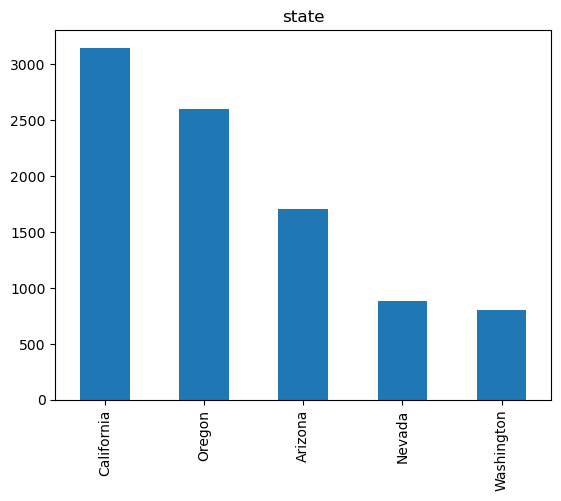

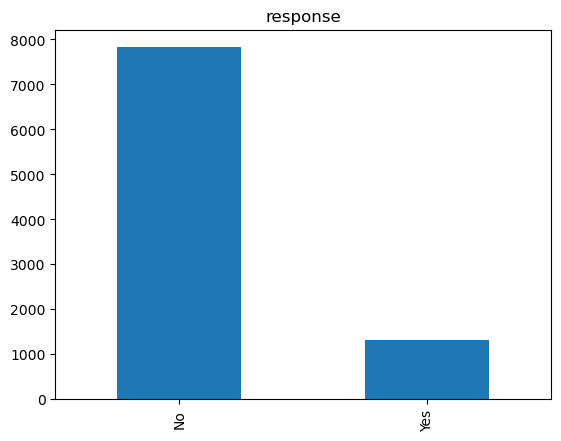

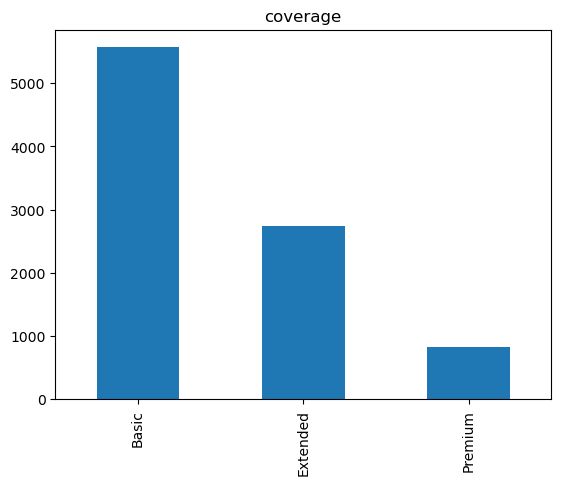

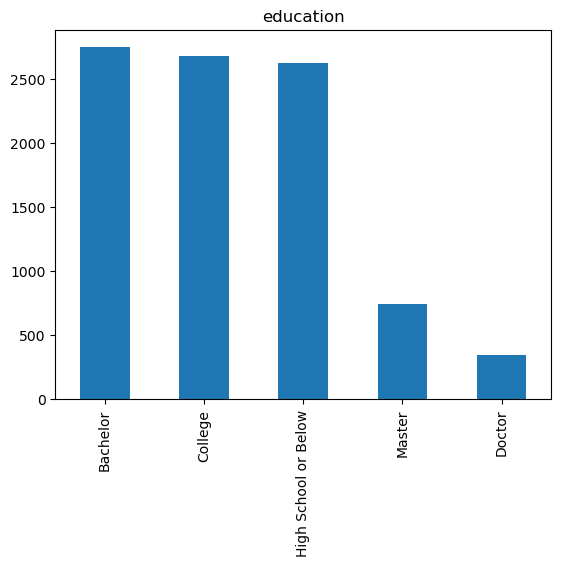

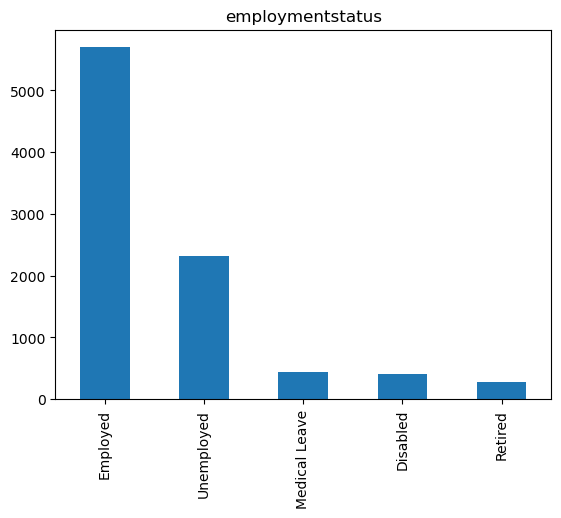

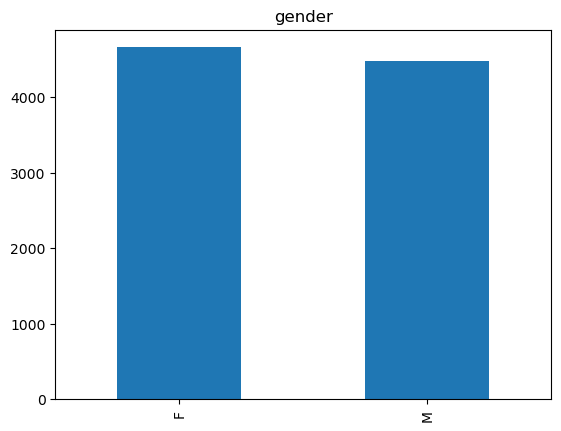

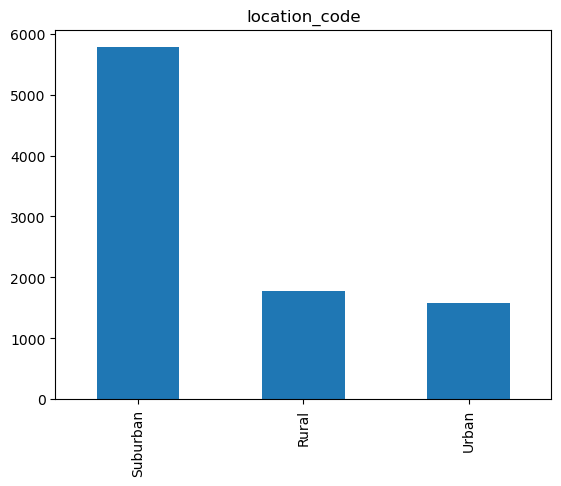

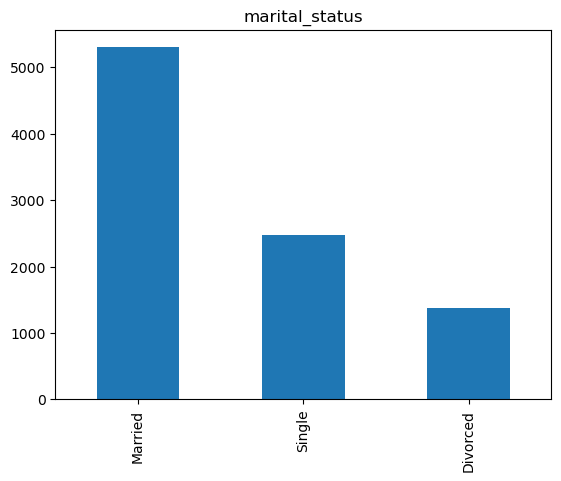

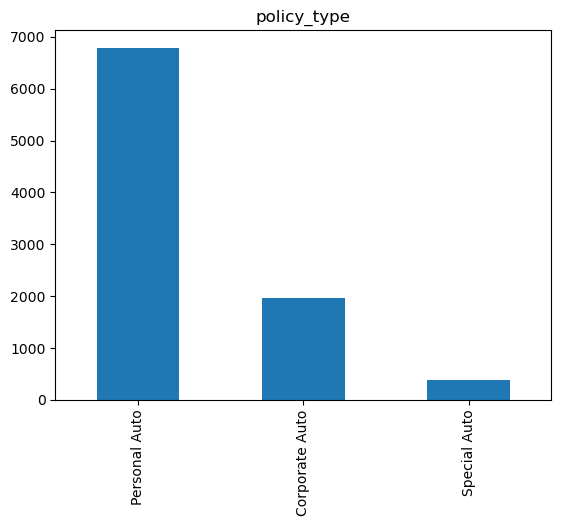

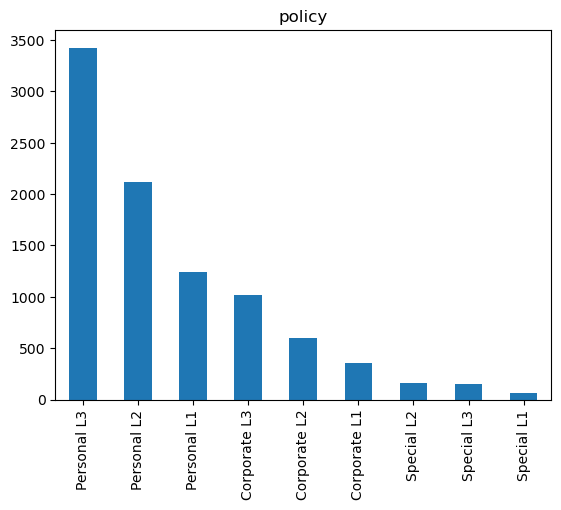

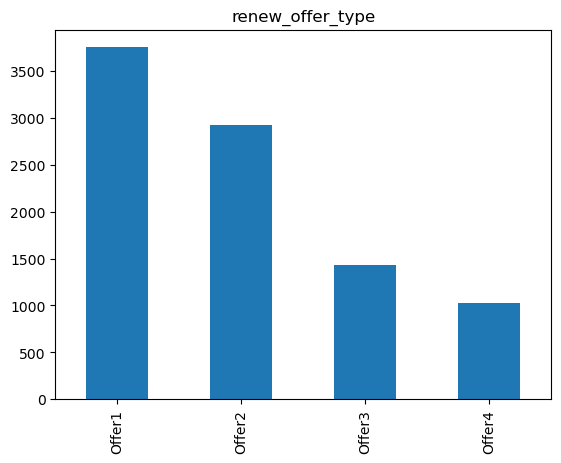

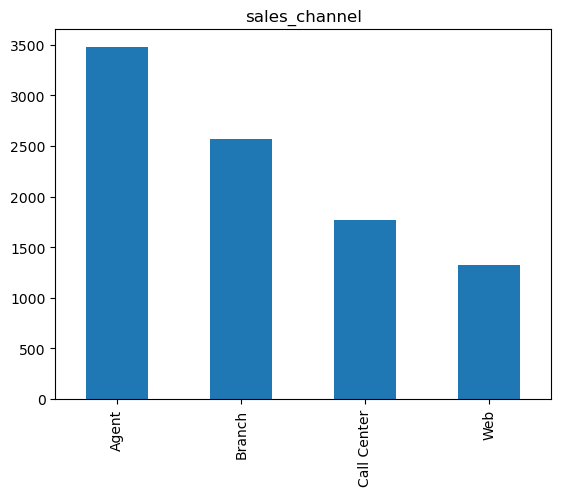

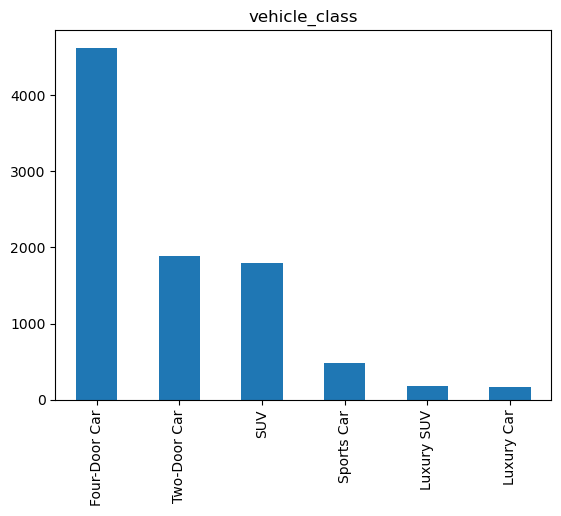

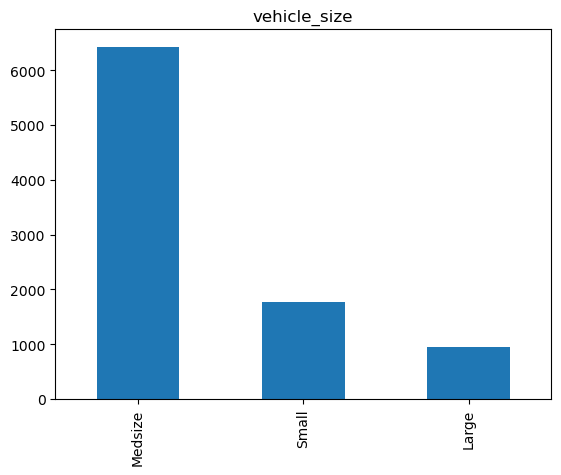

In [12]:
for col in cat_customer.columns:
    plt.figure()
    cat_customer[col].value_counts().plot(kind='bar', title=col)
    plt.show()

In [13]:
# There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them?

# Answer: What do you mean? if the values are close in different categories of the variable, 
# we might want to drop that column (for example the gender category Fem 4658 VS M 4476
# OR we can group them in other cattegories... for example in the sales channel ... 
# if we consider web Vs non-web we will have a bigger difference that if we mantain like it is


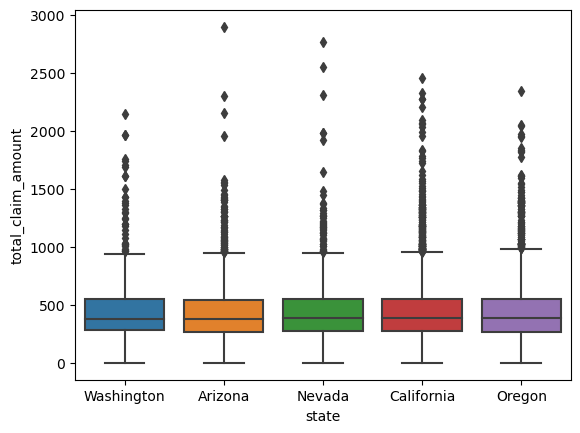

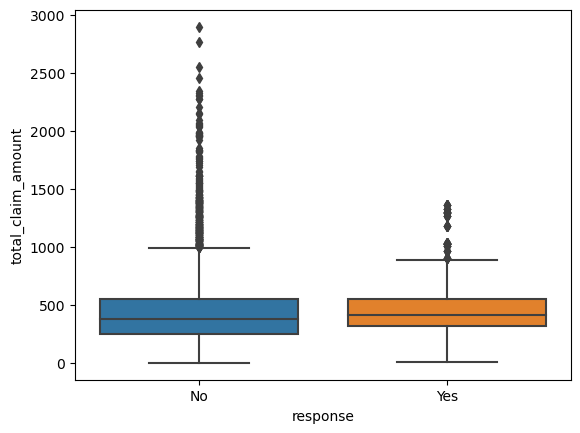

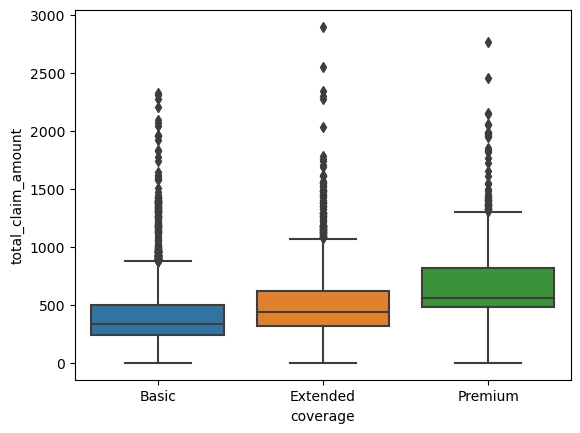

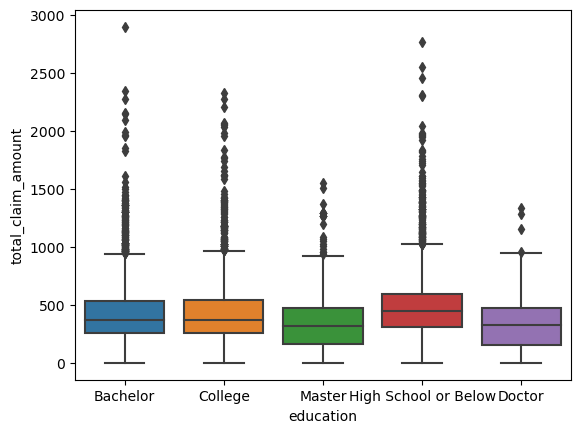

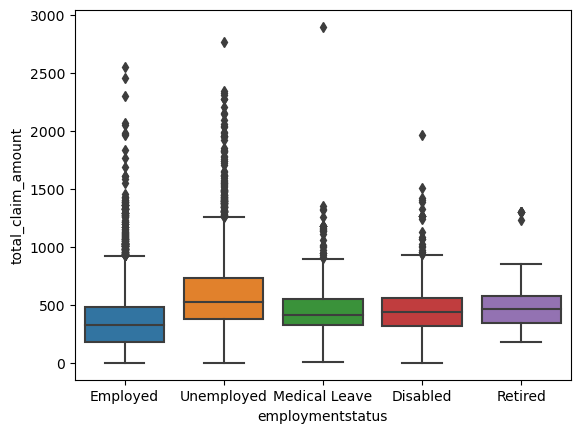

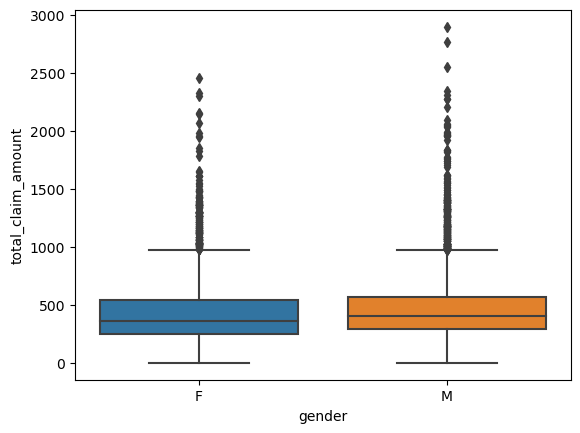

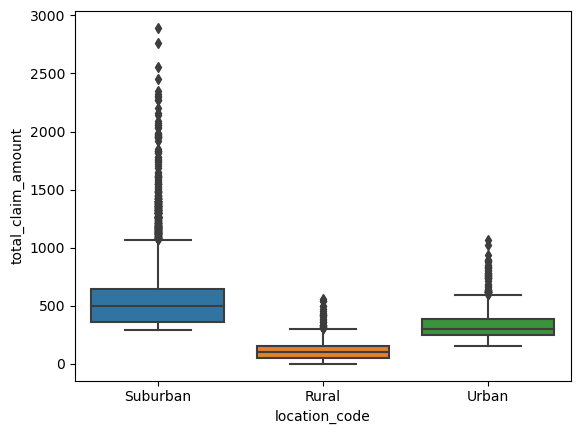

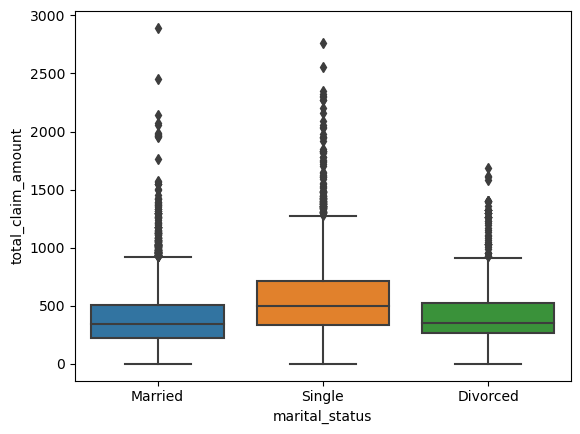

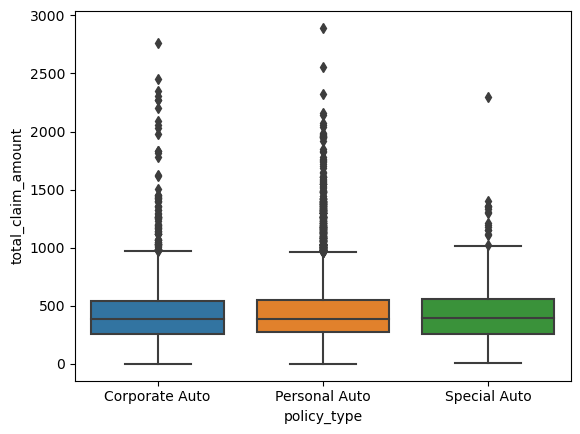

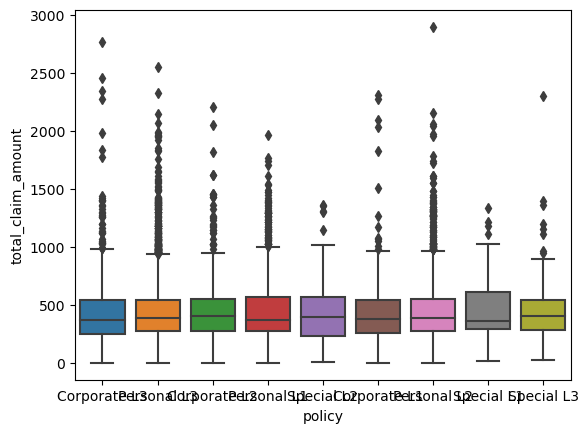

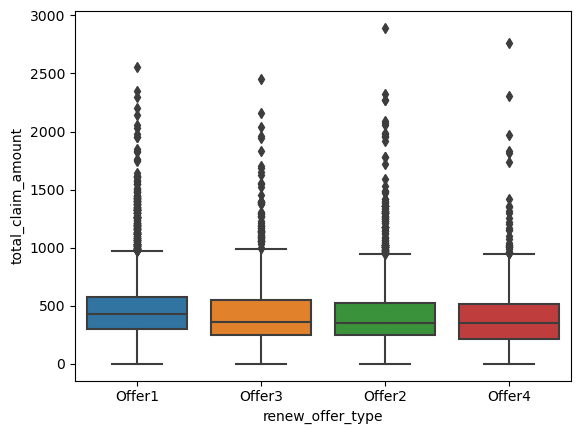

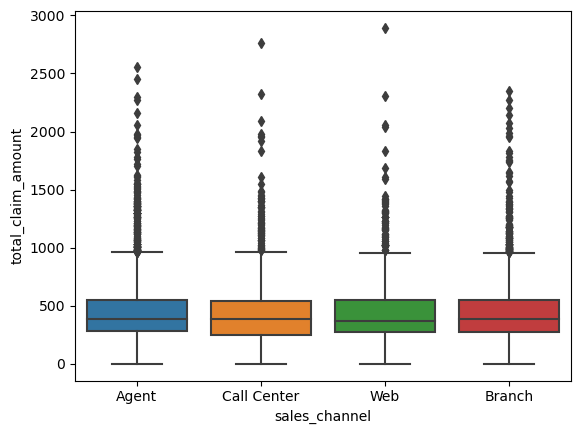

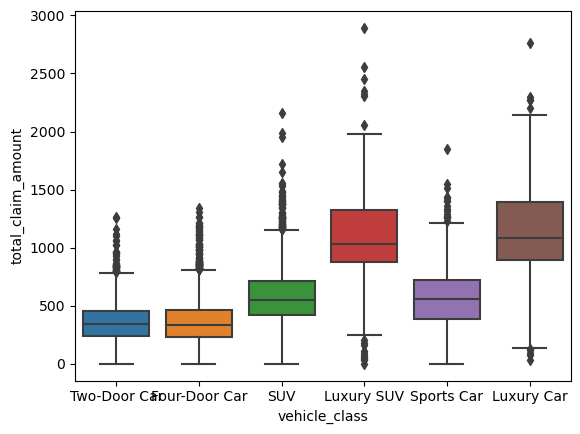

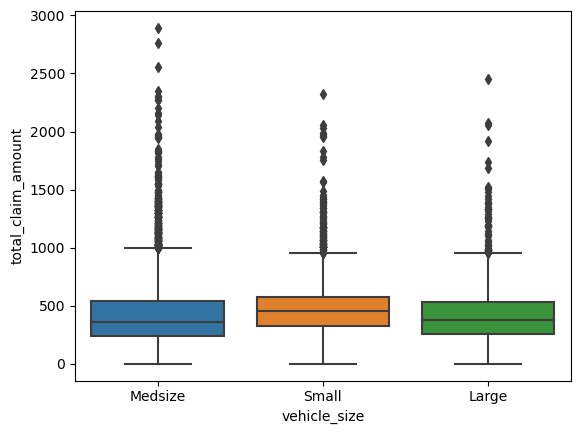

In [14]:
for col in cat_customer.columns: 
    sns.boxplot( x=cat_customer[col], y=num_customer["total_claim_amount"] )
    plt.show()

In [15]:
cat_customer["state"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [16]:
cat_customer["response"].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [17]:
cat_customer["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [18]:
cat_customer["education"].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [19]:
cat_customer["employmentstatus"].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [20]:
cat_customer["gender"].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [21]:
cat_customer["location_code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [22]:
cat_customer["marital_status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [23]:
cat_customer["policy_type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [24]:
cat_customer["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [25]:
cat_customer["renew_offer_type"].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [26]:
cat_customer["sales_channel"].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [27]:
cat_customer["vehicle_class"].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [28]:
cat_customer["vehicle_size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [29]:
# Plot time variable. Can you extract something from it?

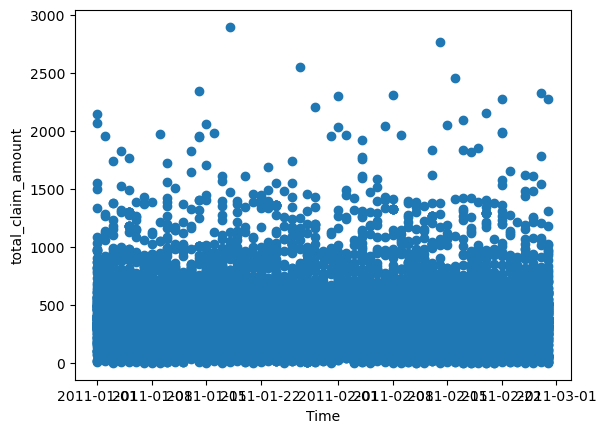

In [32]:
plt.figure(figsize=(100,10))

plt.scatter(customer_df['effective_to_date'], customer_df['total_claim_amount'])
plt.xlabel('Time')
plt.ylabel('total_claim_amount')
plt.show()

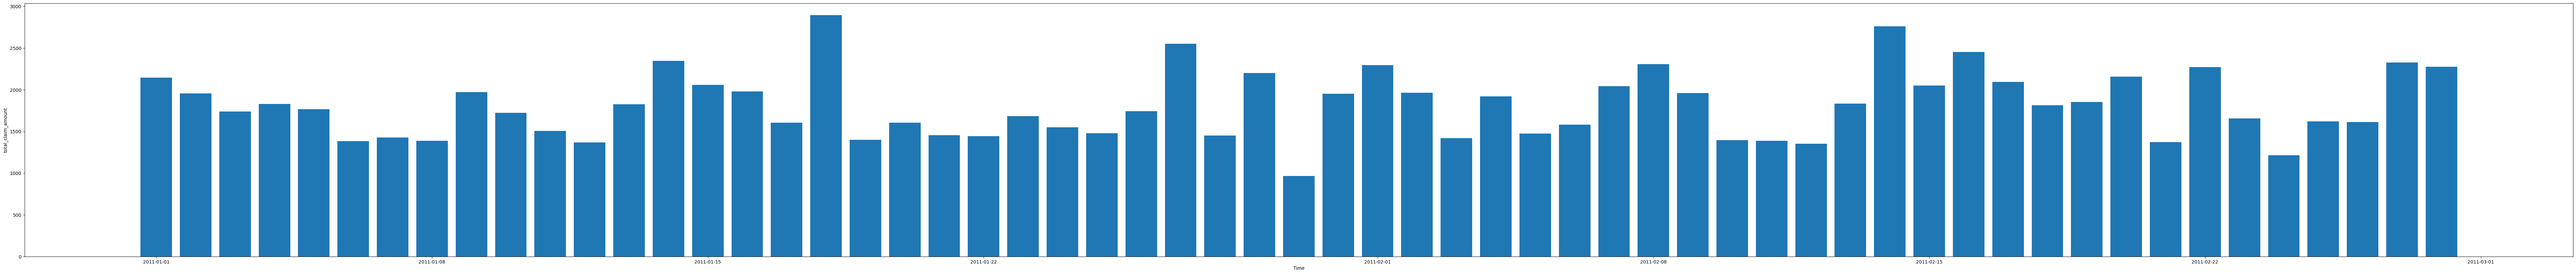

In [35]:
plt.figure(figsize=(100,10))

plt.bar(customer_df['effective_to_date'], customer_df['total_claim_amount'])
plt.xlabel('Time')
plt.ylabel('total_claim_amount')
plt.show()

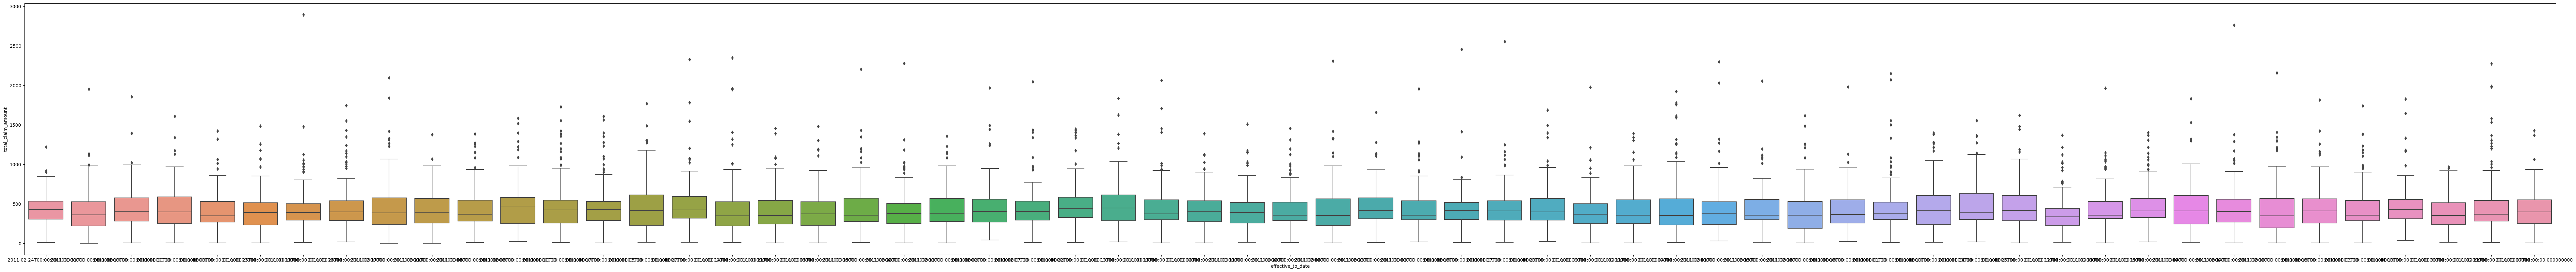

In [34]:
plt.figure(figsize=(100,10))

sns.boxplot(x="effective_to_date", y= customer_df["total_claim_amount"], data = customer_df)
plt.show()

In [ ]:
# cant extract nothing